In [1]:
import numpy as np
import pandas as pd

In [2]:
def find_ab(f, a, b, num_pts=int(1e4)):
    #divide x axis into equal num_pts many sections
    x = [a+(b-a)*i/num_pts for i in range(num_pts)]
    
    #return two pairs such that a is smaller than b and f(a)*f(b) < 0
    for xn in x:
        if(f(a)*f(b)<0):
            return (a,b)
        if(f(xn)*f(b)<0):
            return(xn,b)
        if(f(a)*f(xn)<0):
            return(a,xn)
    #if there is no a and b value that satisfies bisection method
    return (a,b)

In [3]:
def bisection(f,a,b,F,epsilon=1e-12, max_it=int(1e5)):
    #f is the function to apply the bisection method
    #a is the lower bound
    #b is the upper bound
    #F is there to add to the report, since we are treating the differentitaion of our function on the homework as f, we are reporting F which is the function on the homework.
    #epsilon is used to know when to stop, it's value can determine the precision
    #max_it is used to avoid too long for loops with small epsilon values
    
    #create empty lists to report
    list_a = []
    list_b = []
    list_x = []
    list_fx = []
    list_p = [None]
    list_deltadigit = [None]
    
    #check if a is smaller than b
    if(a >= b):
        return('lower bound must be smaller than upper bound')
    #bisection method condition, need a and b values that satisfy f(a)*f(b) < 0
    a,b = find_ab(f,a,b)
    if(f(a)*f(b)>0):
        return "can't find a and b values that satisfy biseciton method condition"
    
    #for loop for each iteration
    for i in range(max_it):
        list_a.append(a)
        list_b.append(b)
        
        #set x to be equal to the mean of a and b
        x = (a+b)/2
        list_x.append(x)
        
        #calculate fx
        fx = f(x)
        Fx = F(x)
        list_fx.append(Fx)
        
        if i!=0 and i!=1:
            list_p.append(np.abs((list_x[i]-list_x[i-1])/(list_x[i-1]-list_x[i-2])))
            list_deltadigit.append(-np.log(np.abs(list_x[i]-list_x[i-1]))+np.log(np.abs(list_x[i-1]-list_x[i-2])))
            
        #return x if f(x) is in range of the precision
        if(np.abs(fx)<epsilon):
            list_p.append(None)
            list_deltadigit.append(None)
            report = pd.DataFrame({'a':list_a,'b':list_b,'x':list_x,'f(x)':list_fx,'(x(k+1)-x(k))/(x(k)-x(k-1))':list_p,'-log(x(k+1)-x(k))+log(x(k)-x(k-1))':list_deltadigit})
            return(report)
        
        #if the root is between a and c then set the new b to be equal to c
        if(f(a)*fx<0):
            b = x
        #if the root is between c and b then set the new a to be equal to c
        if(fx*f(b)<0):
            a = x    
    
    
    #if max_it is surpassed, return the mean of the last a and b
    return('Max iteration reached, try bigger epsilon values or increase it count')

In [4]:
#the function on the homework
def f(x):
    return np.power(x,3)*np.cos(x)*np.sin(x)+3*np.power(x,2)*np.sin(x)-3*x

In [5]:
#first derivative of f
def df(x):
    return -np.power(x,3)*np.power(np.sin(x),2)+(3*np.power(x,2)*np.cos(x)+6*x)*np.sin(x)+\
           np.power(x,3)*np.power(np.cos(x),2)+3*np.power(x,2)*np.cos(x)-3

In [6]:
a = -10
b = 10

output = bisection(f=df, a=a, b=b, F=f, epsilon=1e-5)

root = output.loc[:,'x'].iloc[-1]
print('The value of df on ' + str(root) + ' is equal to ' + str(df(root)))
output

The value of df on 8.846005462110043 is equal to 1.6169714456282236e-06


,a,b,x,f(x),(x(k+1)-x(k))/(x(k)-x(k-1)),-log(x(k+1)-x(k))+log(x(k)-x(k-1))
0,-10.000000,10.000000,0.000000,0.000000,NaN,NaN
1,0.000000,10.000000,5.000000,-120.920640,0.5,0.693147
2,5.000000,10.000000,7.500000,272.957587,0.5,0.693147
3,7.500000,10.000000,8.750000,-209.555318,0.5,0.693147
4,8.750000,10.000000,9.375000,-55.953427,0.5,0.693147
5,8.750000,9.375000,9.062500,-186.526634,0.5,0.693147
6,8.750000,9.062500,8.906250,-212.880585,0.5,0.693147
7,8.750000,8.906250,8.828125,-214.905766,0.5,0.693147
8,8.828125,8.906250,8.867188,-214.826393,0.5,0.693147
9,8.828125,8.867188,8.847656,-215.098491,0.5,0.693147


In [7]:
import matplotlib.pyplot as plt

In [8]:
num_pts = int(1e4)
x = [a+(b-a)*i/num_pts for i in range(num_pts)]
y_f = [f(xn) for xn in x] 
y_df = [df(xn) for xn in x] 

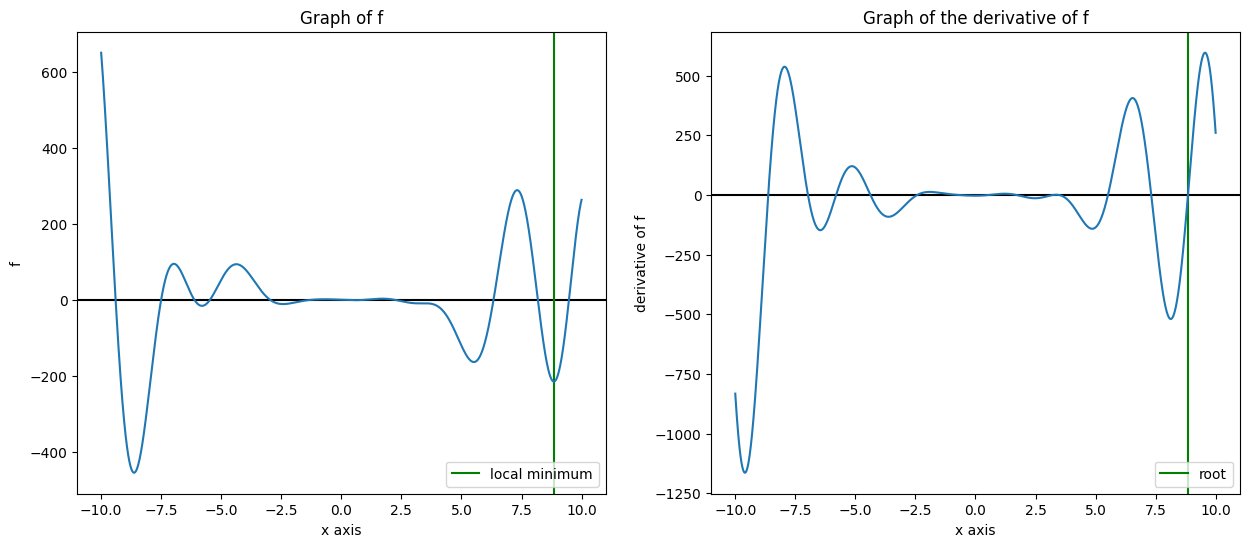

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].axhline(0, color='black')
axes[0].axvline(root, color='g', label='local minimum')
axes[0].plot(x,y_f)
axes[0].set_title('Graph of f')
axes[0].set_xlabel('x axis')
axes[0].set_ylabel('f')
axes[0].legend(loc='lower right')

axes[1].axhline(0, color='black')
axes[1].axvline(root, color='g', label='root')
axes[1].plot(x,y_df)
axes[1].set_title('Graph of the derivative of f')
axes[1].set_xlabel('x axis')
axes[1].set_ylabel('derivative of f')
axes[1].legend(loc='lower right')

plt.show()